## Algerian_Model_Training

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
#load clean dataset
df = pd.read_csv("Algerian_Forest_firesdataset_Cleaned.csv")

In [24]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [26]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [27]:
#drop month day and year
df.drop(['day','month','year'],axis = 1,inplace = True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [28]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [29]:
#modify the other 'not fire' and use only fire and 'not fire'
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [30]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [31]:
#independent features and dependent features
X = df.drop('FWI',axis= 1)
y = df['FWI']

In [32]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [33]:
X_train.shape,X_test.shape

((170, 11), (73, 11))

In [34]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.640179,-0.295442,-0.303129,0.682819,0.495974,0.399434,0.608042,0.474804,0.528734,0.238873
RH,-0.640179,1.000000,0.201762,0.226259,-0.640759,-0.421517,-0.253547,-0.715106,-0.373155,-0.443073,-0.394121
Ws,-0.295442,0.201762,1.000000,0.244784,-0.169620,0.009523,0.092367,-0.004035,0.040699,-0.062718,-0.182236
Rain,-0.303129,0.226259,0.244784,1.000000,-0.536790,-0.288856,-0.304328,-0.341902,-0.300998,-0.367767,-0.051964
FFMC,0.682819,-0.640759,-0.169620,-0.536790,1.000000,0.625593,0.533040,0.748574,0.613526,0.781730,0.251710
DMC,0.495974,-0.421517,0.009523,-0.288856,0.625593,1.000000,0.870419,0.692435,0.983426,0.619536,0.210853
DC,0.399434,-0.253547,0.092367,-0.304328,0.533040,0.870419,1.000000,0.524898,0.943125,0.551208,-0.056844
ISI,0.608042,-0.715106,-0.004035,-0.341902,0.748574,0.692435,0.524898,1.000000,0.652179,0.737184,0.290294
BUI,0.474804,-0.373155,0.040699,-0.300998,0.613526,0.983426,0.943125,0.652179,1.000000,0.616406,0.115434
Classes,0.528734,-0.443073,-0.062718,-0.367767,0.781730,0.619536,0.551208,0.737184,0.616406,1.000000,0.177257


## 1. Feature selection based on Correlation

Remove - highly positively correlated Important = highly negatively correlated

#### Check for multicolinearity

<Axes: >

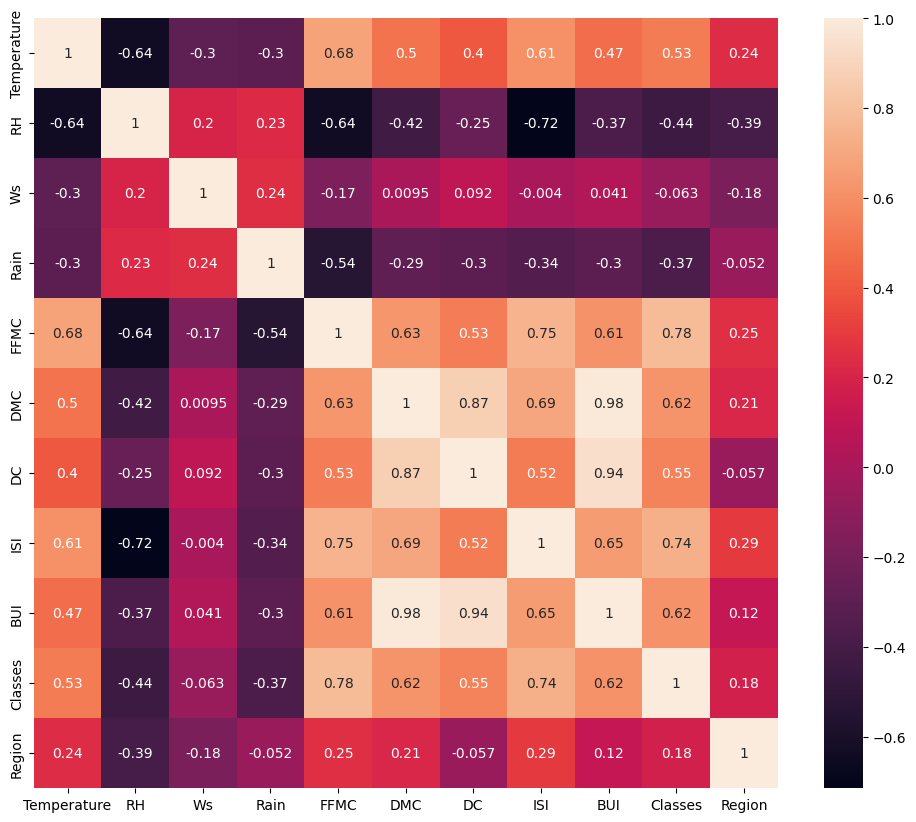

In [35]:
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot = True)

In [36]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (170, 11)
X_test shape:  (73, 11)
y_train shape:  (170,)
y_test shape:  (73,)


In [37]:
#function to remove highly positively correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
## threshold -- Domain expertise... here we are giving 85% correlation
corr_featuers = correlation(X_train, 0.85) #greater than 85%

corr_featuers

{'BUI', 'DC'}

In [39]:
## drop the highly correlated features (more than 85%
X_train.drop(corr_featuers,axis=1,inplace=True)
X_test.drop(corr_featuers,axis=1,inplace=True)
X_train.shape,X_test.shape

((170, 9), (73, 9))

#### Feature Scaling or Standardisation

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled

array([[ 0.26131696, -0.86261203, -0.59170487, ...,  0.57277215,
         0.90992142, -1.        ],
       [-1.64645715,  1.16565969,  0.17323679, ..., -1.03570698,
        -1.098996  , -1.        ],
       [-0.0112222 , -0.5921758 , -1.73911734, ..., -0.82590535,
        -1.098996  , -1.        ],
       ...,
       [-1.91899631,  0.89522346,  0.55570761, ..., -1.05901827,
        -1.098996  , -1.        ],
       [ 0.53385612, -0.25413052,  0.17323679, ...,  0.61939473,
         0.90992142,  1.        ],
       [-0.55630052,  0.96283252,  2.08559091, ..., -0.84921665,
        -1.098996  , -1.        ]])

#### Box plot to understand effect of standard scaler

Text(0.5, 1.0, 'After scaling')

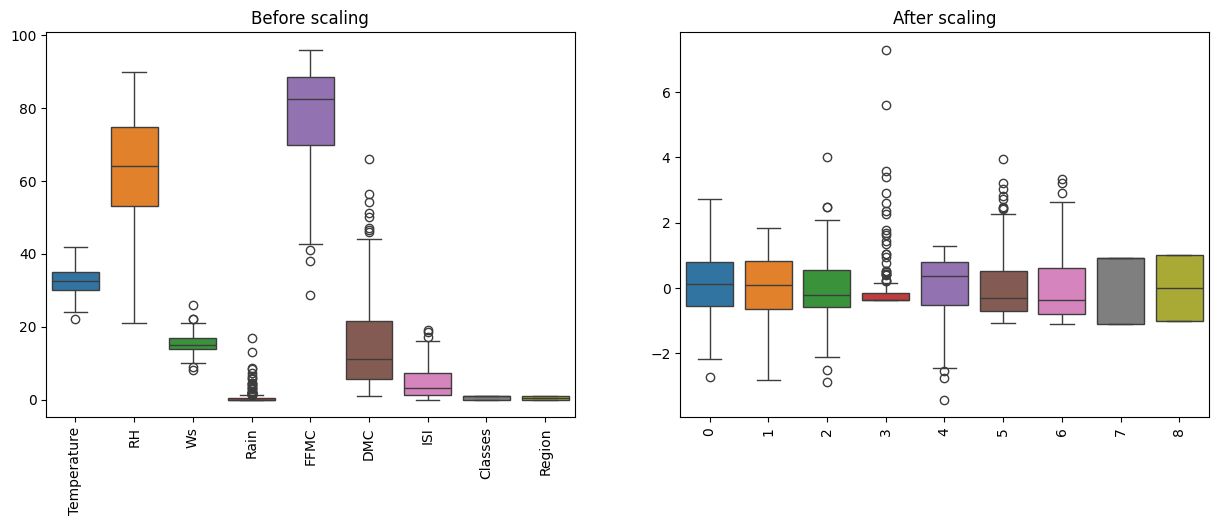

In [42]:
#plotbox plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.xticks(rotation = 90)
plt.title ('Before scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.xticks(rotation = 90)
plt.title ('After scaling')

## ML Models

### 1. Linear Regression Model

Mean absolute error 0.5648036371485077
R2 score 0.9847206874554418


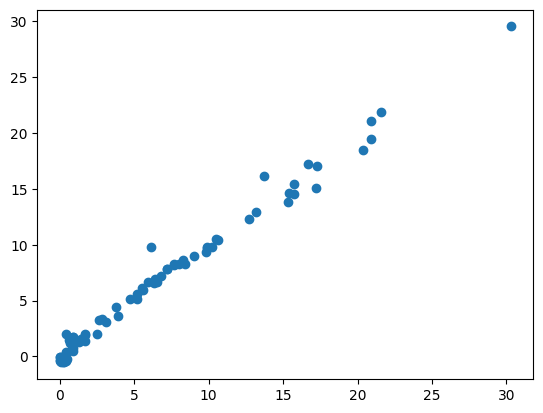

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae= mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

### 2. Lasso Regerssion Model

Mean absolute error 1.1203368882393199
R2 score 0.9511364350928344


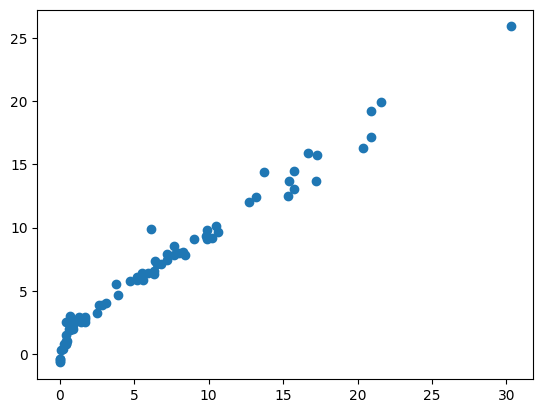

In [44]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error",mae)
print("R2 score",score)
plt.scatter(y_test,y_pred)

### 3. Cross Validation Lasso

In [45]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [46]:
lassocv.alpha_

0.06177603120682054

In [47]:
#what all the alphas that it tried
lassocv.alphas_

array([7.1027424 , 6.62404134, 6.17760312, 5.76125335, 5.37296415,
       5.01084435, 4.67313021, 4.35817688, 4.06445034, 3.79051999,
       3.53505163, 3.29680098, 3.07460763, 2.86738937, 2.67413692,
       2.49390904, 2.32582792, 2.1690749 , 2.02288651, 1.88655073,
       1.75940353, 1.64082562, 1.53023946, 1.42710644, 1.33092425,
       1.24122441, 1.15757004, 1.07955369, 1.00679538, 0.93894074,
       0.87565928, 0.81664278, 0.76160379, 0.71027424, 0.66240413,
       0.61776031, 0.57612533, 0.53729642, 0.50108444, 0.46731302,
       0.43581769, 0.40644503, 0.379052  , 0.35350516, 0.3296801 ,
       0.30746076, 0.28673894, 0.26741369, 0.2493909 , 0.23258279,
       0.21690749, 0.20228865, 0.18865507, 0.17594035, 0.16408256,
       0.15302395, 0.14271064, 0.13309242, 0.12412244, 0.115757  ,
       0.10795537, 0.10067954, 0.09389407, 0.08756593, 0.08166428,
       0.07616038, 0.07102742, 0.06624041, 0.06177603, 0.05761253,
       0.05372964, 0.05010844, 0.0467313 , 0.04358177, 0.04064

In [48]:
lassocv.mse_path_

array([[50.65386968, 76.54197718, 42.60540011, 85.19903601, 37.22447771],
       [44.75111814, 74.82132255, 38.341692  , 85.19903601, 33.05643554],
       [39.36934038, 67.35349762, 32.91718118, 77.16947646, 28.98441557],
       [34.66809152, 60.76849885, 28.30179163, 70.00628728, 25.07891899],
       [30.56005987, 54.39656706, 24.38332378, 63.69553448, 21.70030699],
       [26.96916466, 47.86216351, 21.06462063, 58.13161794, 18.77862509],
       [23.82945553, 42.15575307, 18.26138649, 53.22232605, 16.25301222],
       [21.08318369, 37.17090521, 15.90095328, 46.89293347, 14.07124316],
       [18.68014904, 32.81473426, 13.92043855, 41.32635877, 12.18732916],
       [16.57661964, 29.00744813, 12.26540003, 36.4658746 , 10.56155236],
       [14.73438066, 25.67846082, 10.88893934, 32.22081976,  9.15943046],
       [13.12047322, 22.76665973,  9.75047302, 28.5122238 ,  7.95103045],
       [11.70583482, 20.21881242,  8.81511714, 25.27132199,  6.9102242 ],
       [10.46524798, 17.98854548,  8.0

Mean absolute eror 0.6356015744517419
R2 Score 0.9821627684487946


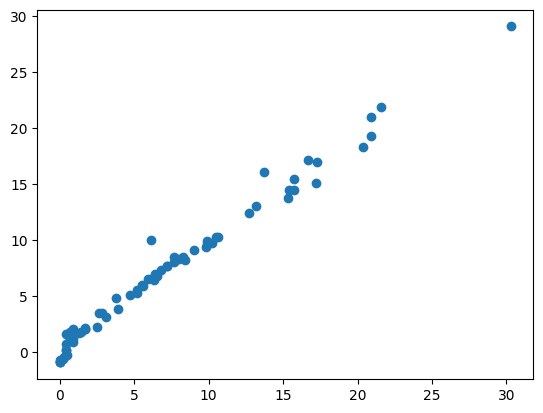

In [49]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute eror",mae)
print("R2 Score",score)

### 4. Ridge Regression

Mean absolute eror 0.5844876727578059
R2 Score 0.9841610358272455


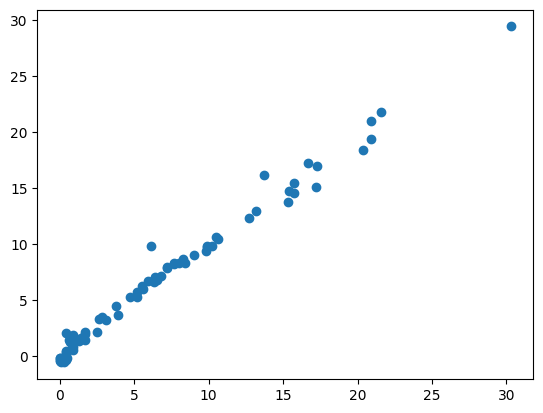

In [50]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute eror",mae)
print("R2 Score",score)
plt.scatter(y_test,y_pred)

### 5. Ridge Regression CV

In [51]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute eror",mae)
print("R2 Score",score)

Mean absolute eror 0.7943132619521931
R2 Score 0.976223192919533


In [52]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

### 6. ElasticNet

Mean Absolute Error:  1.855468747971755
R2 Score:  0.8804077479376988


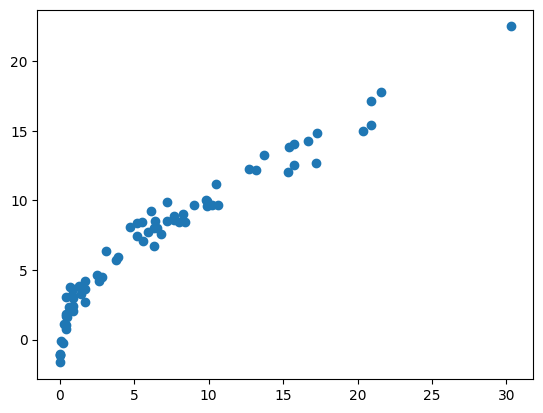

In [53]:
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled, y_train)
y_pred = elasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2)
plt.scatter(y_test, y_pred)

### 7. ElasticNet CV

Mean Absolute Error:  1.855468747971755
R2 Score:  0.8804077479376988


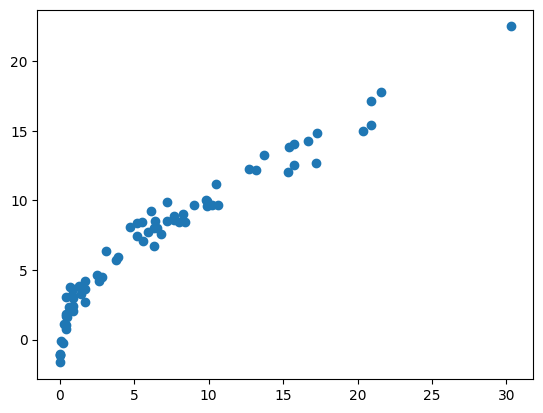

In [54]:
from sklearn.linear_model import ElasticNetCV
elasticNetCV = ElasticNetCV(cv=5)
elasticNetCV.fit(X_train_scaled, y_train)
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2)

#### Model Pickling

In [55]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))

## Summary of Linear Regression Model Selection

Based on the evaluation of various linear regression models, **Ridge Regression emerges as a strong and likely the right choice** for this prediction task.

**Performance Comparison:**

| Model             | Mean Absolute Error (MAE) | R2 Score | Regularization | Feature Selection |
|-------------------|---------------------------|----------|----------------|-------------------|
| Linear Regression | 0.5648                    | 0.9847   | None           | No                |
| Lasso             | 1.1203                    | 0.9511   | L1             | Yes (potential)   |
| LassoCV           | 0.6356                    | 0.9822   | L1 (CV Tuned)  | Yes (potential)   |
| **Ridge** | **0.5845** | **0.9842** | **L2** | **No** |
| RidgeCV           | 0.7943                    | 0.9762   | L2 (CV Tuned)  | No                |
| Elastic Net       | 1.8555                    | 0.8804   | L1 & L2        | Yes (potential)   |
| ElasticNetCV      | 1.8555 (Incorrect Eval)   | 0.8804 (Incorrect Eval) | L1 & L2 (CV Tuned)| Yes (potential)   |

**Key Observations:**

* **Ridge Regression** achieved an R2 score (0.9842) and MAE (0.5845) very close to the best-performing Linear Regression (R2: 0.9847, MAE: 0.5648).
* **Regularization Benefit:** Ridge's L2 regularization offers potential benefits in handling multicollinearity and preventing overfitting without significantly sacrificing predictive performance compared to simple Linear Regression.
* **Lasso and Elastic Net:** While these models offer feature selection capabilities, their performance with default parameters was generally lower. LassoCV showed improvement but didn't surpass Ridge. The ElasticNetCV evaluation was flawed and requires correction.
* **RidgeCV:** Cross-validation for Ridge with default alpha values did not improve upon the performance of the simple Ridge model.

**Conclusion:**

Given the high R2 score and low MAE, coupled with the benefits of L2 regularization for robustness, **Ridge Regression appears to be the most suitable choice among the tested models for this prediction task.** While simple Linear Regression performed slightly better on the test set, Ridge offers a good balance of predictive accuracy and potential for better generalization due to regularization. Further hyperparameter tuning of Ridge could potentially yield even better results. The primary goal of the modeling and the importance of coefficient interpretability should also be considered in the final decision.